=== Исправленная оценка модели предсказания конверсий ===

1. Загрузка модели и данных...
✅ Модель и артефакты загружены
📊 Информация о модели:
   • Фичи: 20
   • Категориальные: 8
   • Числовые: 12
✅ Тестовые данные загружены: (152842, 21)

2. Подготовка тестовых данных...
🔍 Проверка наличия колонок...
✅ Доступные категориальные колонки: ['utm_source_type', 'utm_medium', 'device_category', 'os_type', 'device_browser', 'time_of_day', 'event_category_group', 'country_region']
  Кодируем колонку: utm_source_type
  Кодируем колонку: utm_medium
  Кодируем колонку: device_category
  Кодируем колонку: os_type
  Кодируем колонку: device_browser
  Кодируем колонку: time_of_day
  Кодируем колонку: event_category_group
  Кодируем колонку: country_region
🔍 Проверка фич для модели...
✅ Используем 20 фич из 20
Тестовые фичи: (152842, 20)
Распределение target: {1: 102842, 0: 50000}

3. Расчет метрик качества...
📊 ОСНОВНЫЕ МЕТРИКИ:
ROC-AUC: 0.9945
Accuracy: 0.9803
Precision: 0.9721
Recall: 0.9995
F1-

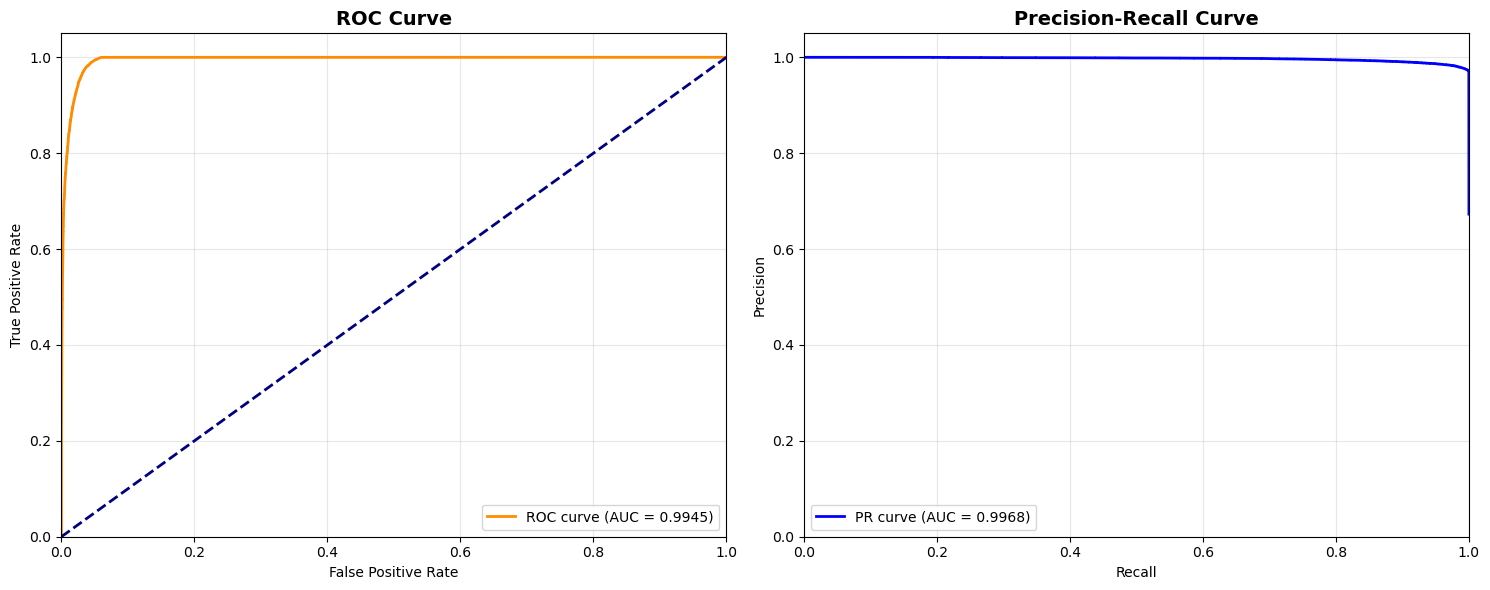

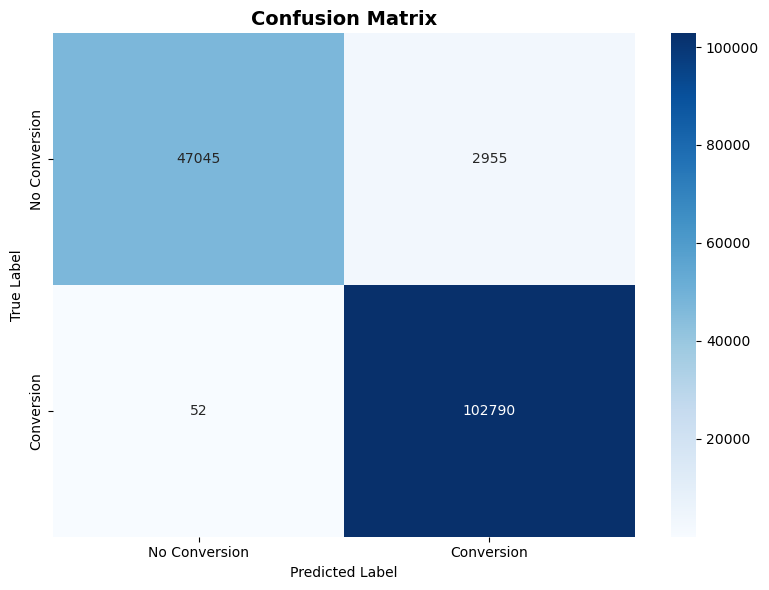


6. Анализ ошибок...
False Positives: 2955
False Negatives: 52

📈 Характеристики False Negatives (пропущенные конверсии):
  utm_source_type: other
  device_category: mobile
  os_type: unknown
  time_of_day: evening

7. Анализ по порогам классификации...
Оптимальный порог: 0.50
F1-Score при оптимальном пороге: 0.9856


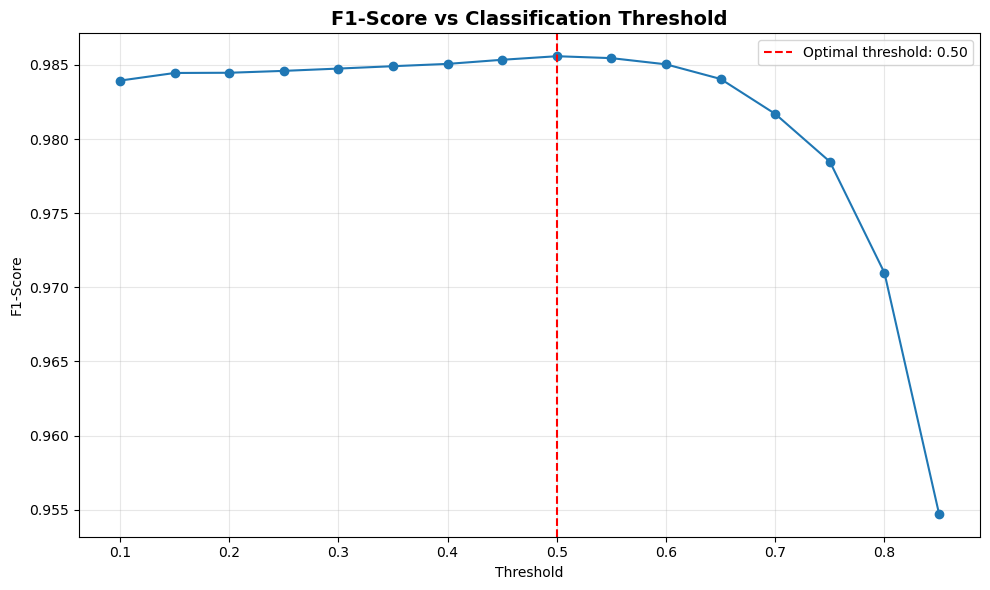


8. Бизнес метрики...
Conversion Rate по UTM источникам:
                 sessions  conversions  conversion_rate
utm_source_type                                        
unknown                12           10           0.8333
social              11935         8117           0.6801
other              140895        94715           0.6722

Conversion Rate по типам устройств:
                 sessions  conversions  conversion_rate
device_category                                        
mobile             113875        76834           0.6747
desktop             37711        25243           0.6694
tablet               1256          765           0.6091

Conversion Rate по времени дня:
             sessions  conversions  conversion_rate
time_of_day                                        
afternoon       48919        34334           0.7019
morning         37507        25210           0.6721
evening         39271        25994           0.6619
night           27145        17304           0.6375



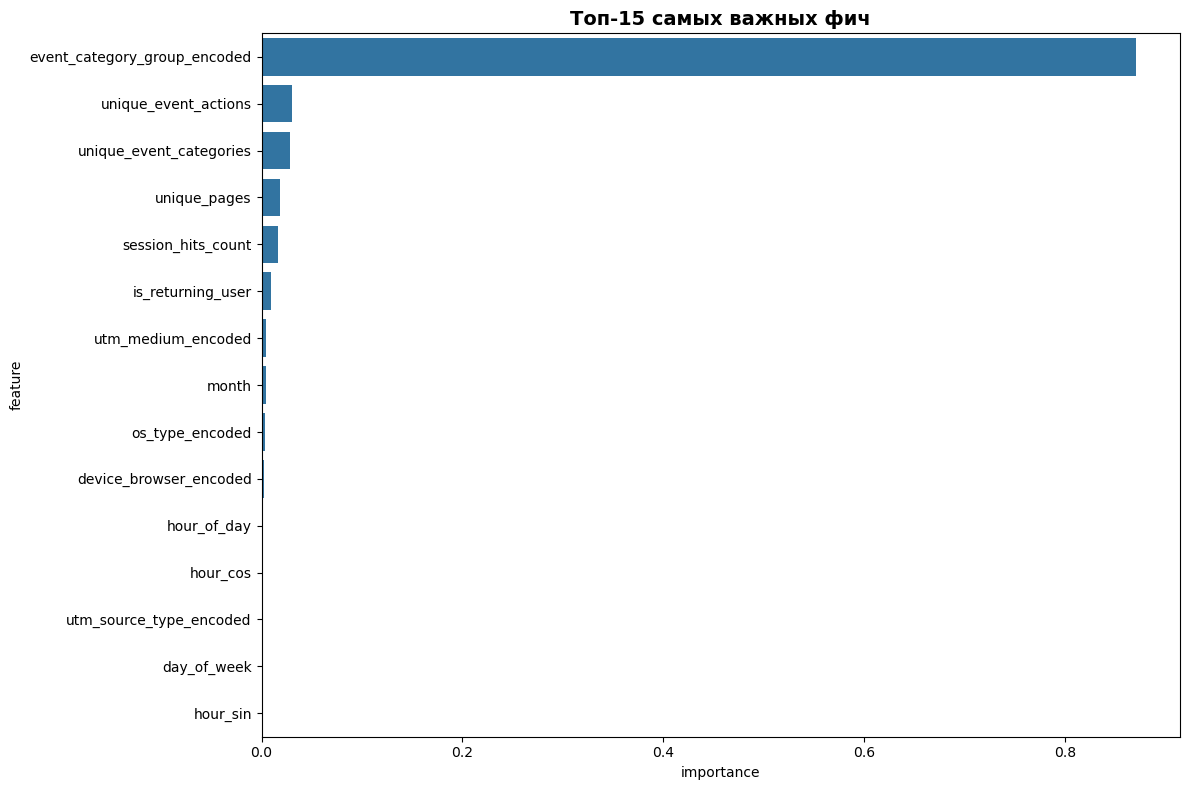


10. Сравнение с baseline...
📊 СРАВНЕНИЕ С BASELINE (всегда конверсия):
               | Наша модель | Baseline 
Accuracy       |   0.9803    |  0.6729
Precision      |   0.9721    |  0.6729
Recall         |   0.9995    |  1.0000
F1-Score       |   0.9547    |  0.8044
💪 Улучшение F1-Score: +18.7%

ФИНАЛЬНАЯ ОЦЕНКА МОДЕЛИ
🎯 КАЧЕСТВО МОДЕЛИ:
   • ROC-AUC: 0.9945
   • PR-AUC: 0.9968
   • F1-Score: 0.9547
   • Precision: 0.9721
   • Recall: 0.9995

📊 СТАТИСТИКА ОШИБОК:
   • False Positives: 2955
   • False Negatives: 52
   • Accuracy: 0.9803

⚙️  РЕКОМЕНДАЦИИ:
   • Оптимальный порог: 0.50
   • Текущий порог: 0.5

📈 ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:
   • Отличное качество модели! 🎉
   • Модель хорошо разделяет классы

💾 СОХРАНЕННЫЕ ГРАФИКИ:
   • plots/roc_pr_curves_final.png - ROC и PR кривые
   • plots/confusion_matrix_final.png - матрица ошибок
   • plots/threshold_analysis_final.png - анализ порогов
   • plots/feature_importance_evaluation.png - важность фич

✅ ОЦЕНКА МОДЕЛИ ЗАВЕРШЕНА!


15680

In [3]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (roc_curve, precision_recall_curve, auc, 
                             classification_report, confusion_matrix, 
                             ConfusionMatrixDisplay, precision_score, recall_score, f1_score,
                             accuracy_score, roc_auc_score)
import joblib
import os
import gc

print("=== Исправленная оценка модели предсказания конверсий ===\n")

# 1. Загрузка модели и данных
print("1. Загрузка модели и данных...")

try:
    # Загрузка модели и артефактов
    model = joblib.load('models/conversion_model.pkl')
    label_encoders = joblib.load('models/label_encoders.pkl')
    feature_info = joblib.load('models/feature_info.pkl')
    print("✅ Модель и артефакты загружены")
    
    print("📊 Информация о модели:")
    print(f"   • Фичи: {len(feature_info['feature_columns'])}")
    print(f"   • Категориальные: {len(feature_info['categorical_columns'])}")
    print(f"   • Числовые: {len(feature_info['numerical_columns'])}")
    
except FileNotFoundError as e:
    print(f"❌ Файлы модели не найдены: {e}")
    print("Сначала запустите 03_model_training_final.ipynb")
    raise

# Загрузка тестовых данных
try:
    # Используем тот же сэмпл, что и при обучении для консистентности
    data = pd.read_csv('model_data_sample.csv')
    print(f"✅ Тестовые данные загружены: {data.shape}")
except FileNotFoundError:
    try:
        data = pd.read_csv('model_data_final.csv')
        print(f"✅ Полные данные загружены: {data.shape}")
        
        # Сэмплируем для скорости
        if len(data) > 100000:
            data = data.sample(n=100000, random_state=42)
            print(f"✅ Взят сэмпл: {data.shape}")
            
    except FileNotFoundError:
        print("❌ Файлы данных не найдены")
        raise

# 2. Подготовка тестовых данных
print("\n2. Подготовка тестовых данных...")

# Проверяем наличие всех необходимых колонок
print("🔍 Проверка наличия колонок...")
missing_columns = set(feature_info['categorical_columns']) - set(data.columns)
if missing_columns:
    print(f"⚠️ Отсутствующие колонки: {missing_columns}")
    print("   Используем только доступные колонки")

# Используем только те колонки, которые есть в данных
available_categorical = [col for col in feature_info['categorical_columns'] if col in data.columns]
print(f"✅ Доступные категориальные колонки: {available_categorical}")

# Применяем Label Encoding только к доступным колонкам
test_data = data.copy()
for col in available_categorical:
    if col in label_encoders:
        print(f"  Кодируем колонку: {col}")
        test_data[col + '_encoded'] = label_encoders[col].transform(test_data[col].astype(str))

# Проверяем наличие всех фич для модели
print("🔍 Проверка фич для модели...")
missing_features = set(feature_info['feature_columns']) - set(test_data.columns)
if missing_features:
    print(f"⚠️ Отсутствующие фичи: {missing_features}")
    # Используем только доступные фичи
    available_features = [col for col in feature_info['feature_columns'] if col in test_data.columns]
else:
    available_features = feature_info['feature_columns']

print(f"✅ Используем {len(available_features)} фич из {len(feature_info['feature_columns'])}")

# Подготавливаем фичи
X_test = test_data[available_features]
y_test = test_data['target']

print(f"Тестовые фичи: {X_test.shape}")
print(f"Распределение target: {y_test.value_counts().to_dict()}")

# 3. Предсказания и метрики
print("\n3. Расчет метрик качества...")

# Предсказания
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Базовые метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("📊 ОСНОВНЫЕ МЕТРИКИ:")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 4. Детальные метрики
print("\n4. Детальные метрики...")

# ROC-AUC кривая
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall кривая
precision_vals, recall_vals, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall_vals, precision_vals)

print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

# 5. Визуализация метрик
print("\n5. Визуализация метрик...")

os.makedirs('plots', exist_ok=True)

# ROC и PR кривые
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)

# PR curve
ax2.plot(recall_vals, precision_vals, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.4f})')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
ax2.legend(loc="lower left")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/roc_pr_curves_final.png', dpi=300, bbox_inches='tight')
plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Conversion', 'Conversion'],
            yticklabels=['No Conversion', 'Conversion'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('plots/confusion_matrix_final.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Анализ ошибок
print("\n6. Анализ ошибок...")

# False Positive/Negative анализ
false_positives = test_data[(y_test == 0) & (y_pred == 1)]
false_negatives = test_data[(y_test == 1) & (y_pred == 0)]

print(f"False Positives: {len(false_positives)}")
print(f"False Negatives: {len(false_negatives)}")

if len(false_negatives) > 0:
    print("\n📈 Характеристики False Negatives (пропущенные конверсии):")
    # Анализируем только оригинальные колонки
    original_columns = [col for col in test_data.columns if not col.endswith('_encoded')]
    fn_analysis = false_negatives[original_columns].mode().iloc[0]
    
    for col in ['utm_source_type', 'device_category', 'os_type', 'time_of_day']:
        if col in fn_analysis:
            print(f"  {col}: {fn_analysis[col]}")

# 7. Анализ по порогам
print("\n7. Анализ по порогам классификации...")

# Находим оптимальный порог по F1-score
f1_scores = []
thresholds = np.arange(0.1, 0.9, 0.05)

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

print(f"Оптимальный порог: {optimal_threshold:.2f}")
print(f"F1-Score при оптимальном пороге: {optimal_f1:.4f}")

# Визуализация F1-score по порогам
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal threshold: {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Classification Threshold', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('plots/threshold_analysis_final.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. Business metrics
print("\n8. Бизнес метрики...")

def analyze_segment_conversions(data, segment_column):
    """Анализ конверсий по сегменту"""
    if segment_column not in data.columns:
        return None
    
    segment_analysis = data.groupby(segment_column).agg({
        'target': ['count', 'sum', 'mean']
    }).round(4)
    segment_analysis.columns = ['sessions', 'conversions', 'conversion_rate']
    return segment_analysis.sort_values('conversion_rate', ascending=False)

print("Conversion Rate по UTM источникам:")
if 'utm_source_type' in test_data.columns:
    utm_analysis = analyze_segment_conversions(test_data, 'utm_source_type')
    if utm_analysis is not None:
        print(utm_analysis.head())

print("\nConversion Rate по типам устройств:")
if 'device_category' in test_data.columns:
    device_analysis = analyze_segment_conversions(test_data, 'device_category')
    if device_analysis is not None:
        print(device_analysis.head())

print("\nConversion Rate по времени дня:")
if 'time_of_day' in test_data.columns:
    time_analysis = analyze_segment_conversions(test_data, 'time_of_day')
    if time_analysis is not None:
        print(time_analysis.head())

# 9. Анализ важности фич
print("\n9. Анализ важности фич...")

if hasattr(model, 'feature_importances_'):
    # Создаем DataFrame с важностью фич
    feature_importance = pd.DataFrame({
        'feature': available_features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Топ-15 самых важных фич:")
    print(feature_importance.head(15))
    
    # Визуализация важности фич
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    sns.barplot(data=top_features, x='importance', y='feature')
    plt.title('Топ-15 самых важных фич', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('plots/feature_importance_evaluation.png', dpi=300, bbox_inches='tight')
    plt.show()

# 10. Сравнение с baseline
print("\n10. Сравнение с baseline...")

# Baseline модель - всегда предсказывает большинство класс
baseline_pred = np.ones_like(y_test)  # Всегда предсказывает конверсию
baseline_accuracy = accuracy_score(y_test, baseline_pred)
baseline_precision = precision_score(y_test, baseline_pred)
baseline_recall = recall_score(y_test, baseline_pred)
baseline_f1 = f1_score(y_test, baseline_pred)

print("📊 СРАВНЕНИЕ С BASELINE (всегда конверсия):")
print(f"               | Наша модель | Baseline ")
print(f"Accuracy       |   {accuracy:.4f}    |  {baseline_accuracy:.4f}")
print(f"Precision      |   {precision:.4f}    |  {baseline_precision:.4f}") 
print(f"Recall         |   {recall:.4f}    |  {baseline_recall:.4f}")
print(f"F1-Score       |   {f1:.4f}    |  {baseline_f1:.4f}")

improvement = ((f1 - baseline_f1) / baseline_f1) * 100
print(f"💪 Улучшение F1-Score: {improvement:+.1f}%")

# 11. Сводка результатов
print("\n" + "="*60)
print("ФИНАЛЬНАЯ ОЦЕНКА МОДЕЛИ")
print("="*60)

print(f"🎯 КАЧЕСТВО МОДЕЛИ:")
print(f"   • ROC-AUC: {roc_auc:.4f}")
print(f"   • PR-AUC: {pr_auc:.4f}")
print(f"   • F1-Score: {f1:.4f}")
print(f"   • Precision: {precision:.4f}")
print(f"   • Recall: {recall:.4f}")

print(f"\n📊 СТАТИСТИКА ОШИБОК:")
print(f"   • False Positives: {len(false_positives)}")
print(f"   • False Negatives: {len(false_negatives)}")
print(f"   • Accuracy: {accuracy:.4f}")

print(f"\n⚙️  РЕКОМЕНДАЦИИ:")
print(f"   • Оптимальный порог: {optimal_threshold:.2f}")
print(f"   • Текущий порог: 0.5")

print(f"\n📈 ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
if roc_auc >= 0.9:
    print("   • Отличное качество модели! 🎉")
    print("   • Модель хорошо разделяет классы")
elif roc_auc >= 0.8:
    print("   • Хорошее качество модели! 👍")
    print("   • Модель имеет хорошую предсказательную способность")
elif roc_auc >= 0.7:
    print("   • Удовлетворительное качество модели ✅")
    print("   • Модель требует дополнительной оптимизации")
else:
    print("   • Качество модели требует улучшения ⚠️")

print(f"\n💾 СОХРАНЕННЫЕ ГРАФИКИ:")
print(f"   • plots/roc_pr_curves_final.png - ROC и PR кривые")
print(f"   • plots/confusion_matrix_final.png - матрица ошибок")
print(f"   • plots/threshold_analysis_final.png - анализ порогов")
if hasattr(model, 'feature_importances_'):
    print(f"   • plots/feature_importance_evaluation.png - важность фич")

print(f"\n✅ ОЦЕНКА МОДЕЛИ ЗАВЕРШЕНА!")
print("="*60)

# Освобождаем память
del data, test_data
gc.collect()